In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import numpy as np


import nltk 
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
snowBallStemmer = SnowballStemmer("english")

import gensim
from gensim.models import Word2Vec


from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_colwidth', 1000)


import itertools
import string
import re
import time
import logging
import pickle

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Using TensorFlow backend.


In [2]:
# def import_tweets(filename, header = None):
# 	                                            #import data from csv file via pandas library
# 	tweet_dataset = pd.read_csv(filename, encoding = 'latin-1', header = header)
# 	                                           #the column names are based on sentiment140 dataset provided on kaggle
# 	tweet_dataset.columns = ['sentiment','id','time','flag','user','tweet']
# 	                                           #delete 3 columns: flags,id,user, as they are not required for analysis
# 	for i in ['flag','id','user']: del tweet_dataset[i] # or tweet_dataset = tweet_dataset.drop(["id","user","date","user"], axis = 1)
# 	                                           #in sentiment140 dataset, positive = 4, negative = 0; So we change positive to 1
# 	tweet_dataset.sentiment = tweet_dataset.sentiment.replace(4,1)
# 	return tweet_dataset

In [3]:
# df= import_tweets("sentiment140.csv")
# df.head()

In [4]:
# df['time']=df['time'].str.slice(11,20)  #slicing to keep the time portion of date time data
# df.head()

In [5]:
# neg_df=df[0:27000]  #taking the negative sentiments data

In [6]:
# pos_df=df[800000:830000]   #taking the positive sentiments data

In [7]:
# scrapped_data=pd.read_csv('depression_scrapped_data.csv')   #loading the depression data collected by twitter scrapping

In [8]:
# scrapped_data.head()

In [9]:
# scrapped_data.drop('Unnamed: 0',axis=1,inplace=True)   #dropping the unnamed column
# scrapped_data.head()

In [10]:
# scrapped_data.dtypes  #showing scrapped data types

In [11]:
# scrapped_data['time']=pd.to_datetime(scrapped_data['time'],format= '%H:%M:%S').dt.time

In [12]:
# scrapped_data.dtypes

In [13]:
# all_df=pd.concat([scrapped_data,pos_df,neg_df],ignore_index=True)
# #concatenating three data frame pos negative and scrapped data frame
# all_df

In [14]:
# all_df['tweet']=all_df['tweet'].astype(str)  #converting tweet data type to string

# #generating wordcloud  for positive tweet ,negative tweet and for all tweet

In [15]:

# from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

# pos_tweet=all_df[all_df['sentiment']==1]
# pos_text = " ".join(review for review in pos_tweet.tweet)

# neg_tweet=all_df[all_df['sentiment']==0]
# neg_text= " ".join(review for review in neg_tweet.tweet)


# all_text= " ".join(review for review in all_df.tweet)

# fig,ax=plt.subplots(3,1,figsize=(100,100))


# pos_wordcloud=WordCloud(max_font_size=50,max_words=100,background_color='black').generate(pos_text)

# neg_wordcloud=WordCloud(max_font_size=50,max_words=100,background_color='black').generate(neg_text)

# all_wordcloud=WordCloud(max_font_size=50,max_words=100,background_color='black').generate(all_text)


# ax[0].imshow(neg_wordcloud, interpolation='bilinear')
# ax[0].set_title('neg_wordcloud',fontsize=30)
# ax[0].axis('off')

# ax[1].imshow(pos_wordcloud, interpolation='bilinear')
# ax[1].set_title('pos_wordcloud',fontsize=30)
# ax[1].axis('off')

# ax[2].imshow(neg_wordcloud, interpolation='bilinear')
# ax[2].set_title('all_wordcloud',fontsize=30)
# ax[2].axis('off')

# pos_wordcloud.to_file('pos_cloud.png')
# neg_wordcloud.to_file('neg_cloud.png')
# all_wordcloud.to_file('all_cloud.png')

In [16]:
# export_data=all_df.to_csv(r'merged_data.csv')   #saving dataframe to local disk

In [17]:
all_df=pd.read_csv('../input/merged_data.csv')
all_df.head()

,Unnamed: 0,sentiment,time,tweet
0,0,0,08:32:48,Me too 😞
1,1,0,20:20:54,bad but ill be fine 🙃
2,2,0,06:22:59,*you
3,3,0,05:36:51,Me irl\n#rt & #follo\n#picture #thoughts #hentai #harem #memes #anxiety #depression #anime #SuicideGirls #girls #IRL #sexy @sadpiixie @cuttingquote @sosadtoday @Iostutopia @arjmxrell @depressionarmy @waybeyondbroken @depressedandcut @alonestfeeIs @Just_Invisiblex @scars_thoughts pic.twitter.com/vN5TWPMkDj
4,4,0,09:13:20,Same for you ❤️


In [18]:
all_df=all_df.drop(['Unnamed: 0'],axis=1)
all_df.head()

,sentiment,time,tweet
0,0,08:32:48,Me too 😞
1,0,20:20:54,bad but ill be fine 🙃
2,0,06:22:59,*you
3,0,05:36:51,Me irl\n#rt & #follo\n#picture #thoughts #hentai #harem #memes #anxiety #depression #anime #SuicideGirls #girls #IRL #sexy @sadpiixie @cuttingquote @sosadtoday @Iostutopia @arjmxrell @depressionarmy @waybeyondbroken @depressedandcut @alonestfeeIs @Just_Invisiblex @scars_thoughts pic.twitter.com/vN5TWPMkDj
4,0,09:13:20,Same for you ❤️


In [19]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60162 entries, 0 to 60161
Data columns (total 3 columns):
sentiment    60162 non-null int64
time         60162 non-null object
tweet        60161 non-null object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [20]:
all_df['tweet']=all_df['tweet'].astype(str)

# preprocessing the tweet 
##Remove punctuations

##Tokenization - Converting a sentence into list of words

##Remove stopwords

##Lammetization/stemming - Tranforming any form of a word to its root word

In [21]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    stopword = stopwords.words('english')
    tweet_stopword=['today','day','still','want','going','got','now','quot','know','think','amp','really','twitter','need','see','im','hi','hey','am','rn','rt','tomorrow','day','night','pm']
    stopword+=tweet_stopword
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopword]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


all_df['tweet']=all_df['tweet'].map(lambda s:preprocess(s)) 
all_df.head()

,sentiment,time,tweet
0,0,08:32:48,
1,0,20:20:54,bad ill fine
2,0,06:22:59,
3,0,05:36:51,irl follo picture thoughts hentai harem memes anxiety depression anime suicidegirls girls irl sexy sadpiixie cuttingquote sosadtoday iostutopia arjmxrell depressionarmy waybeyondbroken depressedandcut alonestfeeis just_invisiblex scars_thoughts pic com vntwpmkdj
4,0,09:13:20,


In [22]:
all_df=all_df.drop(all_df[all_df.tweet.str.len()<1].index)
#dropping rows with empty string

In [23]:
all_df.head()

,sentiment,time,tweet
1,0,20:20:54,bad ill fine
3,0,05:36:51,irl follo picture thoughts hentai harem memes anxiety depression anime suicidegirls girls irl sexy sadpiixie cuttingquote sosadtoday iostutopia arjmxrell depressionarmy waybeyondbroken depressedandcut alonestfeeis just_invisiblex scars_thoughts pic com vntwpmkdj
6,0,22:20:24,keep fighting
7,0,05:02:48,felt
8,0,05:02:31,get better


In [24]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59919 entries, 1 to 60161
Data columns (total 3 columns):
sentiment    59919 non-null int64
time         59919 non-null object
tweet        59919 non-null object
dtypes: int64(1), object(2)
memory usage: 1.8+ MB


In [25]:
%timeit -n 100 all_df.tweet.str.len().max()

32.2 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
# for i in range(1,len(all_df)):
#     if(len(all_df['tweet'])>200):
#         print(all_df['tweet'])

In [27]:
# def remove_punct(text):
#     text  = "".join([char for char in text if char not in string.punctuation])
#     text = re.sub('[0-9]+', '', text)
#     return text

# all_df['tweet_punct_removed'] = all_df['tweet'].apply(lambda x: remove_punct(x))
# all_df.head(10)

In [28]:
# all_df=all_df.replace('\n','',regex=True)
# all_df.head()

### tokenization

In [29]:
# # def tokenization(text):
# #     text = re.split('\W+', text)
# #     return text
# # all_df['tweet_tokenized'] = all_df['tweet_punct_removed'].apply(lambda x: tokenization(x.lower()))
# # all_df.head()

# from nltk.tokenize import TweetTokenizer
# tt = TweetTokenizer()
# all_df['tweet_tokenized'] = all_df['tweet_punct_removed'].apply(lambda x: tt.tokenize(x.lower()))

In [30]:
# import nltk
# from nltk.stem.snowball import SnowballStemmer
# snowStemmer=SnowballStemmer("english")


In [31]:
# all_df['tweet_snowballStemmed']=all_df['tweet_punct_removed'].apply(lambda x: [snowStemmer.stem(y) for y in x.split()])
# all_df.head(20)

In [32]:
all_df.head(100)

,sentiment,time,tweet
1,0,20:20:54,bad ill fine
3,0,05:36:51,irl follo picture thoughts hentai harem memes anxiety depression anime suicidegirls girls irl sexy sadpiixie cuttingquote sosadtoday iostutopia arjmxrell depressionarmy waybeyondbroken depressedandcut alonestfeeis just_invisiblex scars_thoughts pic com vntwpmkdj
6,0,22:20:24,keep fighting
7,0,05:02:48,felt
8,0,05:02:31,get better
...,...,...,...
116,0,10:41:44,fuck thing call life
117,0,07:40:51,pic com yvzthtti
118,0,06:05:41,take kill
119,0,17:39:11,idk


In [33]:
decode_map = {0: "NEGATIVE",1: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [34]:
%%time
all_df.sentiment = all_df.sentiment.apply(lambda x: decode_sentiment(x))

CPU times: user 37.5 ms, sys: 14 µs, total: 37.5 ms
Wall time: 37.1 ms


Text(0.5, 1.0, 'Dataset labels distribuition')

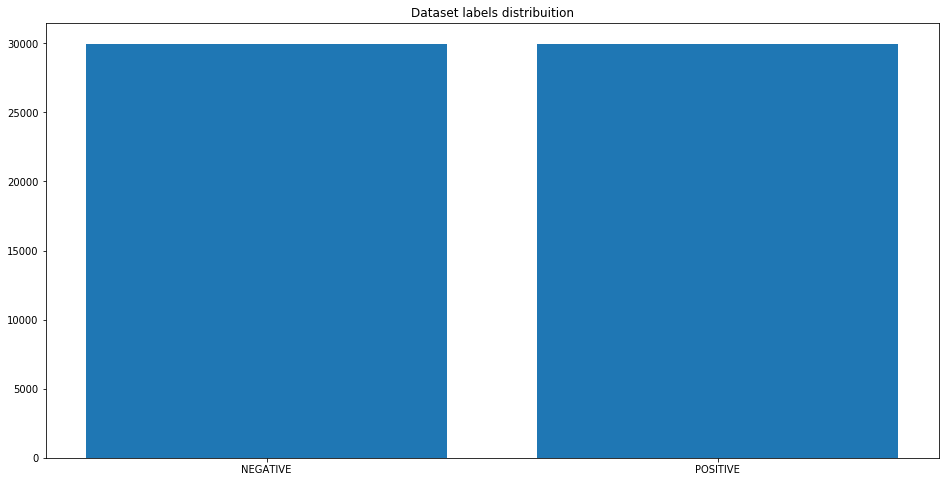

In [35]:
from collections import Counter
sentiment_cnt = Counter(all_df.sentiment)

plt.figure(figsize=(16,8))
plt.bar(sentiment_cnt.keys(), sentiment_cnt.values())
plt.title("Dataset labels distribuition")

In [36]:
TRAIN_SIZE = 0.8

# # TEXT CLENAING
# TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

# KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

# SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
SENTIMENT_THRESHOLDS = (0.5)

# EXPORT
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

In [37]:
df_train, df_test = train_test_split(all_df, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 47935
TEST size: 11984


Word2VEC****

In [38]:
%%time
documents = [_text.split() for _text in df_train.tweet] 

CPU times: user 250 ms, sys: 9.98 ms, total: 260 ms
Wall time: 262 ms


In [39]:
w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)

In [40]:
# Set log
w2v_model.build_vocab(documents)

In [41]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 3628


In [42]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

CPU times: user 34 s, sys: 250 ms, total: 34.3 s
Wall time: 19.9 s


(7110984, 9990016)

In [43]:
w2v_model.most_similar("bad")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('terrible', 0.408480167388916),
 ('good', 0.39822468161582947),
 ('swollen', 0.3490647077560425),
 ('confident', 0.34751200675964355),
 ('nasty', 0.34470945596694946),
 ('infection', 0.3237406611442566),
 ('special', 0.31502386927604675),
 ('awful', 0.31395578384399414),
 ('depressing', 0.30668964982032776),
 ('raw', 0.30564823746681213)]

In [44]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.tweet)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 48177
CPU times: user 1.13 s, sys: 54 ms, total: 1.19 s
Wall time: 1.19 s


In [45]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.tweet), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.tweet), maxlen=SEQUENCE_LENGTH)

CPU times: user 1.64 s, sys: 21 ms, total: 1.66 s
Wall time: 1.66 s


In [46]:
#Label Encoder
labels = df_train.sentiment.unique().tolist()
labels

['POSITIVE', 'NEGATIVE']

In [47]:
encoder = LabelEncoder()
encoder.fit(df_train.sentiment.tolist())

y_train = encoder.transform(df_train.sentiment.tolist())
y_test = encoder.transform(df_test.sentiment.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (47935, 1)
y_test (11984, 1)


In [48]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (47935, 300)
y_train (47935, 1)

x_test (11984, 300)
y_test (11984, 1)


In [49]:
y_train[:10]

array([[1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1]])

##Embedding Layer

In [50]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(48177, 300)


In [51]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)


Build Model

In [52]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          14453100  
_________________________________________________________________
dropout_1 (Dropout)          (None, 300, 300)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 14,613,601
Trainable params: 160,501
Non-trainable params: 14,453,100
_________________________________________________________________


In [53]:
#compile model

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [54]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]


In [55]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Train on 43141 samples, validate on 4794 samples
Epoch 1/8
43141/43141 [==============================] - 14s 329us/step - loss: 0.5977 - accuracy: 0.6779 - val_loss: 0.5458 - val_accuracy: 0.7307
Epoch 2/8


/opt/conda/lib/python3.6/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


43141/43141 [==============================] - 13s 301us/step - loss: 0.5647 - accuracy: 0.7047 - val_loss: 0.5348 - val_accuracy: 0.7365
Epoch 3/8
43141/43141 [==============================] - 13s 298us/step - loss: 0.5530 - accuracy: 0.7155 - val_loss: 0.5308 - val_accuracy: 0.7388
Epoch 4/8
43141/43141 [==============================] - 14s 322us/step - loss: 0.5506 - accuracy: 0.7149 - val_loss: 0.5245 - val_accuracy: 0.7422
Epoch 5/8
43141/43141 [==============================] - 13s 301us/step - loss: 0.5416 - accuracy: 0.7222 - val_loss: 0.5221 - val_accuracy: 0.7397
Epoch 6/8
43141/43141 [==============================] - 13s 292us/step - loss: 0.5402 - accuracy: 0.7237 - val_loss: 0.5198 - val_accuracy: 0.7426
Epoch 7/8
43141/43141 [==============================] - 13s 298us/step - loss: 0.5347 - accuracy: 0.7279 - val_loss: 0.5158 - val_accuracy: 0.7426
Epoch 8/8
43141/43141 [==============================] - 13s 309us/step - loss: 0.5319 - accuracy: 0.7271 - val_loss: 0.51

In [56]:
##Evaluate
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

11984/11984 [==============================] - 1s 83us/step

ACCURACY: 0.7324766516685486
LOSS: 0.534776577086888


In [57]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy', 'lr'])


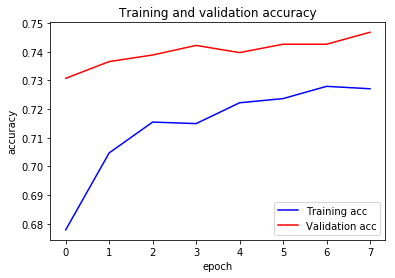

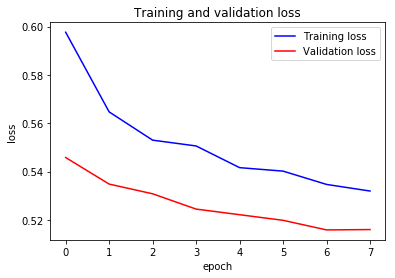

<Figure size 432x288 with 0 Axes>

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
 
plt.show()

plt.savefig('training_val_acc.png')

In [59]:
   def decode_sentiment(score):
       return NEGATIVE if score < 0.6 else POSITIVE
  

In [60]:
def predict(text):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score)

    return {"label": label,"score":float(score),
       "elapsed_time": time.time()-start_at}  

In [61]:
predict("I love the music")

{'label': 'POSITIVE',
 'score': 0.9138059616088867,
 'elapsed_time': 0.22543001174926758}

In [62]:
predict("I hate the rain")

{'label': 'NEGATIVE',
 'score': 0.023574700579047203,
 'elapsed_time': 0.04829072952270508}

In [63]:
predict("i don't know what is happening with me")

{'label': 'NEGATIVE',
 'score': 0.5435318946838379,
 'elapsed_time': 0.04834175109863281}

##Confusion Matrix

In [64]:
%%time
y_pred_1d = []
y_test_1d = list(df_test.sentiment)
scores = model.predict(x_test, verbose=1, batch_size=100)
y_pred_1d = [decode_sentiment(score) for score in scores]

11984/11984 [==============================] - 6s 521us/step
CPU times: user 6.28 s, sys: 55.3 ms, total: 6.33 s
Wall time: 6.28 s


In [65]:
   def plot_confusion_matrix(cm, classes,title='Confusion matrix',
                             cmap=plt.cm.Blues):

   # This function prints and plots the confusion matrix.
    #Normalization can be applied by setting `normalize=True`.


    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

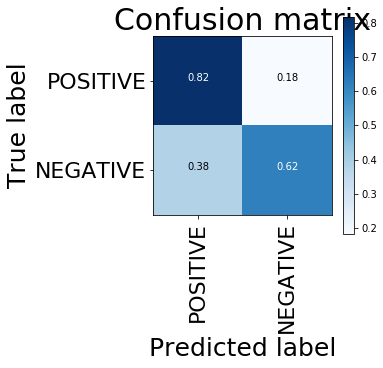

CPU times: user 367 ms, sys: 104 ms, total: 471 ms
Wall time: 334 ms


<Figure size 432x288 with 0 Axes>

In [66]:
%%time

cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(4,4))
plot_confusion_matrix(cnf_matrix, classes=df_train.sentiment.unique(), title="Confusion matrix")
plt.show()
plt.savefig('confusion_matrix.png')

In [67]:
print(classification_report(y_test_1d, y_pred_1d))

              precision    recall  f1-score   support

    NEGATIVE       0.69      0.82      0.75      6040
    POSITIVE       0.77      0.62      0.69      5944

    accuracy                           0.72     11984
   macro avg       0.73      0.72      0.72     11984
weighted avg       0.73      0.72      0.72     11984



In [68]:
accuracy_score(y_test_1d, y_pred_1d)

0.7203771695594126

In [69]:
model.save(KERAS_MODEL)
w2v_model.save(WORD2VEC_MODEL)
pickle.dump(tokenizer, open(TOKENIZER_MODEL, "wb"), protocol=0)
pickle.dump(encoder, open(ENCODER_MODEL, "wb"), protocol=0)

In [70]:
# model1 = gensim.models.Word2Vec(all_df['tweet_lemmatized'], min_count = 1,  
#                               size = 100, window = 5) 

# print("Cosine similarity between 'sad' " + 
#                "and 'tired' - CBOW : ", 
#     model1.similarity('sad', 'tired')) 

In [71]:
# print("Cosine similarity between 'travel' " + 
#                "and 'happy' - CBOW : ", 
#     model1.similarity('hurt', 'suicide')) 

#Naive Bayes and other algorithm


In [72]:
X = all_df.tweet # get all the text in x variable
y = all_df.sentiment # get all the sentiments into y variable
print(X.shape) #print shape of x
print(y.shape) # print shape of y

(59919,)
(59919,)


In [73]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=30) # split the data into traing and testing set where ratio is 80:20


# X_train is the tweets of training data, X_test is the testing tweets which we have to predict, y_train is the sentiments of tweets in the traing data and y_test is the sentiments of the tweets  which we will use to measure the accuracy of the model

In [74]:
vect = TfidfVectorizer(analyzer = "word", ngram_range=(1,3)) # Get Tf-idf object and save it as vect. We can select features from here we just have simply change 
                                                                                     #the ngram range to change the features also we can remove stop words over here with the help of stop parameter

In [75]:
vect.fit(X_train) # fit or traing data tweets to vect
X_train_dtm = vect.transform(X_train) # transform our training data tweets

In [76]:
X_test_dtm = vect.transform(X_test)# transform our testing data tweets

In [77]:
from sklearn.naive_bayes import MultinomialNB # import Multinomial Naive Bayes model from sklearn.naive_bayes
nb = MultinomialNB(alpha = 10)

In [78]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=10, class_prior=None, fit_prior=True)

In [79]:
from sklearn.model_selection import cross_val_score  # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = nb, X = X_train_dtm, y = y_train, cv = 10) # do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean()

0.7394180567578347

In [80]:
y_pred_nb = nb.predict(X_test_dtm) # predict the sentiments of testing data tweets

In [81]:
from sklearn import metrics # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_nb) # measure the accuracy of our model on the testing data

0.736648865153538

In [82]:
from sklearn.metrics import confusion_matrix # import confusion matrix from the sklearn.metrics
conf_matrix=confusion_matrix(y_test, y_pred_nb) # plot the confusion matrix between our predicted sentiments and the original testing data sentiments

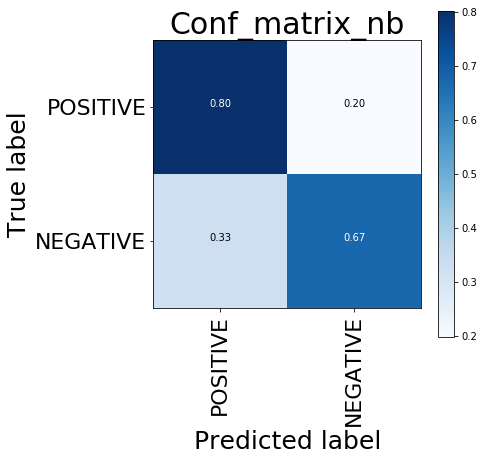

CPU times: user 385 ms, sys: 137 ms, total: 521 ms
Wall time: 285 ms


<Figure size 432x288 with 0 Axes>

In [83]:
%%time
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes=df_train.sentiment.unique(), title="Conf_matrix_nb")
plt.show()
plt.savefig('confusion_matrix_naive_bayes.png')

In [84]:
from sklearn.linear_model import LogisticRegression # import Logistic Regression model from sklearn.linear_model
logisticRegr = LogisticRegression(C = 1.1) # get object of logistic regression model with cost parameter = 1.1

In [85]:
logisticRegr.fit(X_train_dtm, y_train)# fit our both traing data tweets as well as its sentiments to the logistic regression model

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
from sklearn.model_selection import cross_val_score # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = logisticRegr, X = X_train_dtm, y = y_train, cv = 10) # do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() # measure the mean accuray of 10 fold cross validation

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7496401502264648

In [87]:
y_pred_lg = logisticRegr.predict(X_test_dtm)  # predict the sentiments of testing data tweets

In [88]:
from sklearn import metrics # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_lg) # measure the accuracy of our model on the testing data

0.7424065420560748

In [89]:
from sklearn.metrics import confusion_matrix # import confusion matrix from the sklearn.metrics
conf_matrix=confusion_matrix(y_test, y_pred_lg) # plot the confusion matrix between our predicted sentiments and the original testing data sentiments

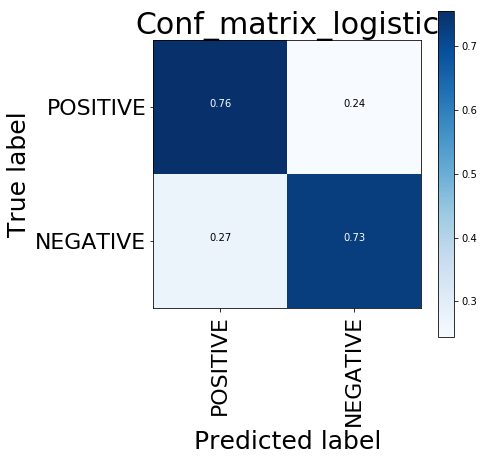

CPU times: user 360 ms, sys: 150 ms, total: 509 ms
Wall time: 278 ms


<Figure size 432x288 with 0 Axes>

In [90]:
%%time
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes=df_train.sentiment.unique(), title="Conf_matrix_logistic")
plt.show()
plt.savefig('confusion_matrix_naive_bayes.png')

## SVM

In [91]:
from sklearn.svm import LinearSVC # import SVC model from sklearn.svm
svm_clf = LinearSVC(random_state=0) # get object of SVC model with random_state parameter = 0

In [92]:
svm_clf.fit(X_train_dtm, y_train)# fit our both traing data tweets as well as its sentiments to the SVC model

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

In [93]:
from sklearn.model_selection import cross_val_score  # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = svm_clf, X = X_train_dtm, y = y_train, cv = 10)# do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() # measure the mean accuray of 10 fold cross validation

0.7519973808063212

In [94]:
y_pred_svm = svm_clf.predict(X_test_dtm)  # predict the sentiments of testing data tweets

In [95]:
from sklearn import metrics  # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_svm)  # measure the accuracy of our model on the testing data

0.7429072096128171

In [96]:
from sklearn.metrics import confusion_matrix # import confusion matrix from the sklearn.metrics
conf_matrix=confusion_matrix(y_test, y_pred_svm)# plot the confusion matrix between our predicted sentiments and the original testing data sentiments

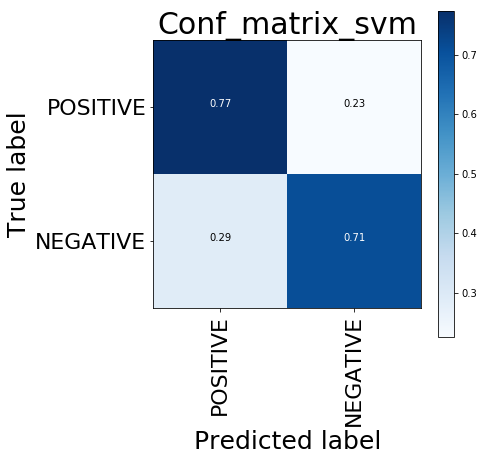

CPU times: user 351 ms, sys: 159 ms, total: 509 ms
Wall time: 279 ms


<Figure size 432x288 with 0 Axes>

In [97]:
%%time
plt.figure(figsize=(6,6))
plot_confusion_matrix(conf_matrix, classes=df_train.sentiment.unique(), title="Conf_matrix_svm")
plt.show()
plt.savefig('confusion_matrix.png')